In [1]:
# EDA and Preprocessing

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder , OneHotEncoder , StandardScaler 


In [61]:

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE



In [4]:
df=pd.read_csv("employee.csv")
df.head(5)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [5]:
#2.Data Exploration: 


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [7]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [8]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [9]:
df.Salary.mean()

5312.467741935484

In [10]:
df.Salary.quantile([0.75,0.50,0.25])

0.75    8000.0
0.50    5000.0
0.25    3030.0
Name: Salary, dtype: float64

In [11]:
df['Salary']=df['Salary'].fillna(df['Salary'].mean())
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,1
144,Infosys,22.0,8787.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


In [12]:
df.duplicated().sum()


4

In [13]:
len(df['Salary'])

148

In [14]:
unique_values ={col: df[col].unique() for col in df.columns}
print(unique_values)

{'Company': array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object), 'Age': array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.]), 'Salary': array([5312.46774194, 2300.        , 3000.        , 4000.        ,
       5000.        , 6000.        , 7000.        , 8000.        ,
       9000.        , 1089.        , 1234.        , 3030.        ,
       3045.        , 3184.        , 4824.        , 5835.        ,
       7084.        , 8943.        , 8345.        , 9284.        ,
       9876.        , 2034.        , 7654.        , 2934.        ,
       4034.        , 5034.        , 8202.        , 9024.        ,
       4345.        , 6544.        , 6543.        , 3234.        ,
       4324.        , 5435.        , 5555.        , 8787.        ,
       3454.        , 5654.        , 5009.        , 5098.        ,
      

In [15]:
# 3.Data Cleaning: 


In [16]:
df.describe()

,Age,Salary,Gender
count,130.000000,148.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2354.305003,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3149.250000,0.000000
50%,32.500000,5312.467742,0.000000
75%,37.750000,7084.000000,0.000000
max,54.000000,9876.000000,1.000000


In [17]:
print("Column names:", df.columns)
print("Unique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Column names: Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')
Unique values in each column:
Company: 6 unique values
Age: 29 unique values
Salary: 41 unique values
Place: 11 unique values
Country: 1 unique values
Gender: 2 unique values


In [18]:
# Descriptive statistics
print(df.describe())
print(df.info())


              Age       Salary      Gender
count  130.000000   148.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2354.305003    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3149.250000    0.000000
50%     32.500000  5312.467742    0.000000
75%     37.750000  7084.000000    0.000000
max     54.000000  9876.000000    1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   148 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
None


In [19]:
#Rename columns if necessary
df.columns = [col.lower().replace(" ", "_") for col in df.columns]
df


,company,age,salary,place,country,gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,1
144,Infosys,22.0,8787.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


In [20]:
# Step 3: Data Cleaning

# Replace age = 0 with NaN, as age cannot be zero
df['age'].replace(0, np.nan, inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_13740\2468241521.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(0, np.nan, inplace=True)


In [21]:
# Identify and handle missing values
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
company     8
age        24
salary      0
place      14
country     0
gender      0
dtype: int64


In [22]:
#treat null values with mean, median, or mode
df.fillna({
    'age': df['age'].median(),  # Example: Fill age with median
    'salary': df['salary'].mean()  # Replace salary nulls with mean
# Add other columns as needed
}, inplace=True)

In [23]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [24]:

# Outlier detection and treatment
# Using IQR for detecting outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    df.loc[outlier_condition, column] = np.nan
    df[column].fillna(df[column].median(), inplace=True)


In [25]:
df

,company,age,salary,place,country,gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


In [26]:
# Apply the outlier function to numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    remove_outliers(df, col)

C:\Users\HP\AppData\Local\Temp\ipykernel_13740\224052192.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13740\224052192.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [27]:
#Step 4: Data Analysis

# Filter df for age > 40 and salary < 5000
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
print("Filtered df:\n", filtered_df)


Filtered df:
      company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India     0.0
32   Infosys  45.0  4034.0   Calcutta   India     0.0
39   Infosys  41.0  3000.0     Mumbai   India     0.0
50   Infosys  41.0  3000.0    Chennai   India     0.0
57   Infosys  51.0  3184.0  Hyderabad   India     0.0
68   Infosys  43.0  4034.0     Mumbai   India     0.0
75   Infosys  44.0  3000.0     Cochin   India     0.0
86   Infosys  41.0  3000.0      Delhi   India     0.0
93   Infosys  54.0  3184.0     Mumbai   India     0.0
104  Infosys  44.0  4034.0      Delhi   India     0.0
122  Infosys  44.0  3234.0     Mumbai   India     0.0
129  Infosys  50.0  3184.0   Calcutta   India     0.0
138      CTS  44.0  3033.0     Cochin   India     0.0
140  Infosys  44.0  4034.0  Hyderabad   India     0.0
145  Infosys  44.0  4034.0      Delhi   India     0.0


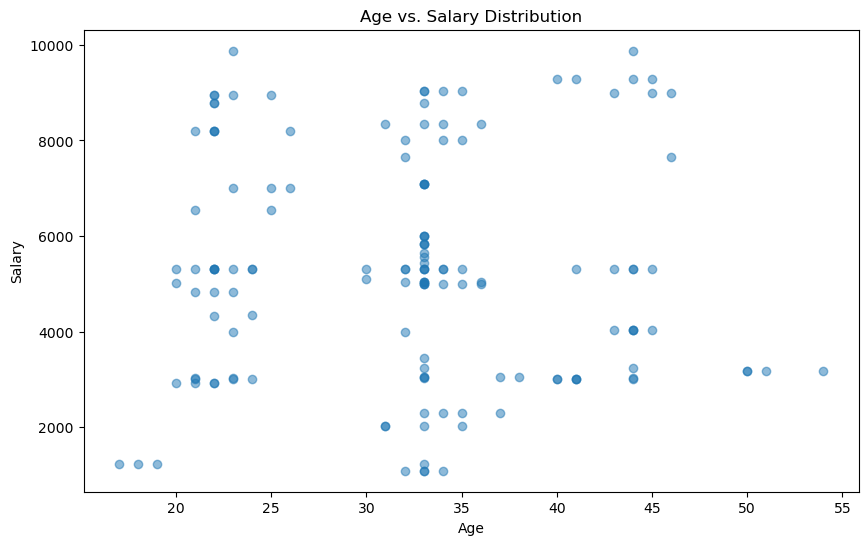

In [28]:
# Plot age vs salary
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['salary'], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs. Salary Distribution")
plt.show()

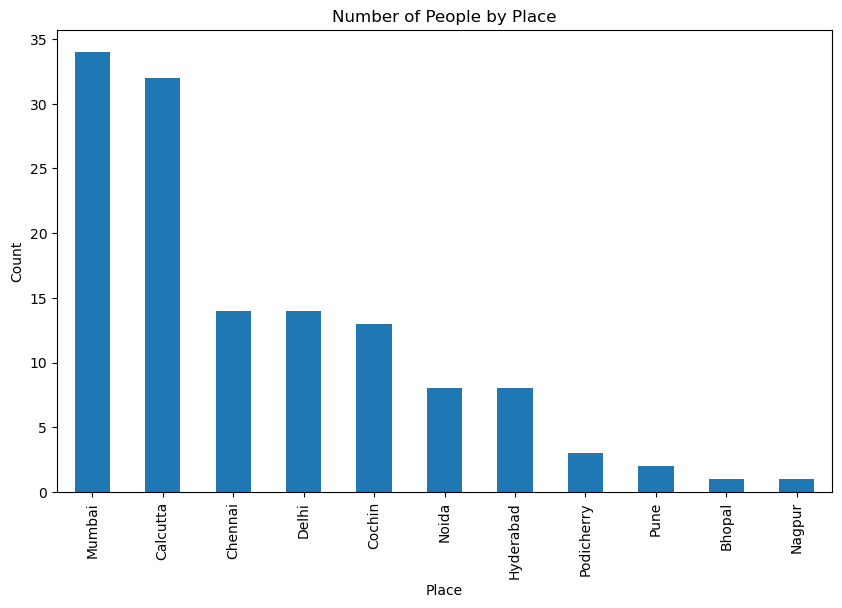

In [29]:
# Count and plot the number of people from each place
place_counts = df['place'].value_counts()
plt.figure(figsize=(10, 6))
place_counts.plot(kind='bar')
plt.title("Number of People by Place")
plt.xlabel("Place")
plt.ylabel("Count")
plt.show()

In [32]:
#5.Data Encoding

In [46]:
df['place_Encoder'] = le.fit_transform(df['place'])
df.head(10)

,age,salary,place,gender,company_Congnizant,company_Infosys,company_Infosys Pvt Lmt,company_TCS,company_Tata Consultancy Services,place_Encoder
0,20.0,5312.467742,2,0.0,False,False,False,True,False,2
1,30.0,5312.467742,6,0.0,False,True,False,False,False,6
2,35.0,2300.000000,1,0.0,False,False,False,True,False,1
3,40.0,3000.000000,4,0.0,False,True,False,False,False,4
4,23.0,4000.000000,6,0.0,False,False,False,True,False,6
5,33.0,5000.000000,1,0.0,False,True,False,False,False,1
6,33.0,6000.000000,2,0.0,False,False,False,True,False,2
7,23.0,7000.000000,6,0.0,False,True,False,False,False,6
8,34.0,8000.000000,1,0.0,False,False,False,True,False,1
9,45.0,9000.000000,4,0.0,False,False,False,False,False,4


In [51]:
#one hot Encoding
ohe = pd.get_dummies(df['place_Encoder'],prefix = 'place')
df=pd.concat([df,ohe],axis = 1)
df.head(10)

,age,salary,place,gender,company_Congnizant,company_Infosys,company_Infosys Pvt Lmt,company_TCS,company_Tata Consultancy Services,place_Encoder,...,place_2,place_3,place_4,place_5,place_6,place_7,place_8,place_9,place_10,place_11
0,20.0,5312.467742,2,0.0,False,False,False,True,False,2,...,True,False,False,False,False,False,False,False,False,False
1,30.0,5312.467742,6,0.0,False,True,False,False,False,6,...,False,False,False,False,True,False,False,False,False,False
2,35.0,2300.000000,1,0.0,False,False,False,True,False,1,...,False,False,False,False,False,False,False,False,False,False
3,40.0,3000.000000,4,0.0,False,True,False,False,False,4,...,False,False,True,False,False,False,False,False,False,False
4,23.0,4000.000000,6,0.0,False,False,False,True,False,6,...,False,False,False,False,True,False,False,False,False,False
5,33.0,5000.000000,1,0.0,False,True,False,False,False,1,...,False,False,False,False,False,False,False,False,False,False
6,33.0,6000.000000,2,0.0,False,False,False,True,False,2,...,True,False,False,False,False,False,False,False,False,False
7,23.0,7000.000000,6,0.0,False,True,False,False,False,6,...,False,False,False,False,True,False,False,False,False,False
8,34.0,8000.000000,1,0.0,False,False,False,True,False,1,...,False,False,False,False,False,False,False,False,False,False
9,45.0,9000.000000,4,0.0,False,False,False,False,False,4,...,False,False,True,False,False,False,False,False,False,False


In [53]:
# Step 6: Feature Scaling

# Standard scaling
scaler = StandardScaler()
df['salary_std'] = scaler.fit_transform(df[['salary']])
df.head(5)

,age,salary,place,gender,company_Congnizant,company_Infosys,company_Infosys Pvt Lmt,company_TCS,company_Tata Consultancy Services,place_Encoder,...,place_3,place_4,place_5,place_6,place_7,place_8,place_9,place_10,place_11,salary_std
0,20.0,5312.467742,2,0.0,False,False,False,True,False,2,...,False,False,False,False,False,False,False,False,False,0.010324
1,30.0,5312.467742,6,0.0,False,True,False,False,False,6,...,False,False,False,True,False,False,False,False,False,0.010324
2,35.0,2300.000000,1,0.0,False,False,False,True,False,1,...,False,False,False,False,False,False,False,False,False,-1.266072
3,40.0,3000.000000,4,0.0,False,True,False,False,False,4,...,False,True,False,False,False,False,False,False,False,-0.969479
4,23.0,4000.000000,6,0.0,False,False,False,True,False,6,...,False,False,False,True,False,False,False,False,False,-0.545775


In [58]:
# 7.MinMax scaling
minmax = MinMaxScaler()
df['salary_minmax']=minmax.fit_transform(df[['salary']])
minmax

MinMaxScaler()